# <center>National Park Service About Endangered Species</center>

For this project, we will interpret data from the National Parks Service about endangered species in different parks.

We will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, we will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

After we perform your analysis, we will share your findings about the National Park Service.

### National Park Service

<img src="https://www.eenews.net/image_assets/2020/08/image_asset_90137.jpg" alt="NPS" style="zoom:40%;" />

National Park Service (NPS), agency of the U.S. Department of the Interior that manages and maintains several hundred national parks, monuments, historical sites, and other designated properties of the federal government. It was established in 1916 by an act of the U.S. Congress that was signed into law by U.S. Pres. Woodrow Wilson. The law stipulated that the new service was to “conserve the scenery and the natural and historic objects and the wild life therein and…leave them unimpaired for the enjoyment of future generations.”

An endangered species is a species that is very likely to become extinct in the near future, either worldwide or in a particular political jurisdiction. Endangered species may be at risk due to factors such as habitat loss, poaching and invasive species. The International Union for Conservation of Nature (IUCN) Red List lists the global conservation status of many species, and various other agencies assess the status of species within particular areas. Many nations have laws that protect conservation-reliant species which, for example, forbid hunting, restrict land development, or create protected areas. Some endangered species are the target of extensive conservation efforts such as captive breeding and habitat restoration.

### Conservation status

<img src="https://image.isu.pub/100707150116-3c2b387f38174169afc127af1a227616/jpg/page_1.jpg" alt="Endangered" style="zoom:30%" />

The conservation status of a species indicates the likelihood that it will become extinct. Many factors are considered when assessing the status of a species; e.g., such statistics as the number remaining, the overall increase or decrease in the population over time, breeding success rates, or known threats. The IUCN Red List of Threatened Species is the best-known worldwide conservation status listing and ranking system.

Over 50% of the world's species are estimated to be at risk of extinction. Internationally, 195 countries have signed an accord to create Biodiversity Action Plans that will protect endangered and other threatened species. In the United States, such plans are usually called Species Recovery Plans.

### About the data

We have been given two CSV files:

1. **species_info.csv** - contains data about different species and their conservation status

2. **observations.csv** - holds recorded sightings of different species at several national parks for the past 7 days.

**species_info.csv**:

- **category** - class of animal
- **scientific_name** - the scientific name of each species
- **common_name** - the common names of each species
- **conservation_status** - each species’ current conservation status

**observations.csv**:

- **scientific_name** - the scientific name of each species
- **park_name** - Park where species were found
- **observations** - the number of times each species was observed at park

**The Dataset:**

- Content was provided by [Codeacademy.com](https://www.codecademy.com/learn)

## 1. Importing Python Modules

In [1]:
# Importing library necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset
df_ob = pd.read_csv('observations.csv')
df_species = pd.read_csv('species_info.csv')

# Success
print("Observations dataset has {} data points with {} variables each.".format(*df_ob.shape))
print("Species dataset has {} data points with {} variables each.".format(*df_species.shape))

Observations dataset has 23296 data points with 3 variables each.
Species dataset has 5824 data points with 4 variables each.


## 2. Inspecting Data

In [2]:
# Inspecting data
print(df_ob.columns)
print('---' * 25)
print(df_species.columns)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')
---------------------------------------------------------------------------
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


In [3]:
# Checking null values
df_ob.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [4]:
# Checking null values 2
df_species.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

The Null Values are for regular situation species (not endangered). Let's fix this.

In [5]:
df_species['conservation_status'].fillna('Regular', inplace=True)

In [6]:
df_species['conservation_status'].unique()

array(['Regular', 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [7]:
# Total of unique species names
print(f"Total species:{len(df_species['common_names'].unique())}\nTotal Unique Scientific Names: {len(df_species)}")


Total species:5504
Total Unique Scientific Names: 5824


The lenght of columns of the species dataset is longer than the total number of unique species. This means that are **duplicated `common_names`**.

In [8]:
df_species[df_species['common_names'].duplicated()].head()

,category,scientific_name,common_names,conservation_status
59,Mammal,Oryzomys palustris palustris,Marsh Rice Rat,Regular
124,Bird,Melanitta fusca,White-Winged Scoter,Regular
243,Bird,Anthus spinoletta,Water Pipit,Regular
278,Bird,Vermivora chrysoptera X pinus,Brewster's Warbler,Regular
280,Bird,Vermivora lawrencii,Lawrence's Warbler,Regular


In [9]:
df_species[df_species['common_names'] == 'Marsh Rice Rat']

,category,scientific_name,common_names,conservation_status
58,Mammal,Oryzomys palustris,Marsh Rice Rat,Regular
59,Mammal,Oryzomys palustris palustris,Marsh Rice Rat,Regular


Both `scientific_name` and `common_names` columns has duplicate values, to solve this, we will use regex to get the first name of `common_names` and making a new column calling `first_common_names`.

In [10]:
df_species['first_common_names'] = df_species['common_names'].str.replace(r'\W+\w+', regex=True, repl='')
df_species.head()

,category,scientific_name,common_names,conservation_status,first_common_names
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Regular,Gapper
1,Mammal,Bos bison,"American Bison, Bison",Regular,American
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Regular,Aurochs
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Regular,Domestic)
4,Mammal,Cervus elaphus,Wapiti Or Elk,Regular,Wapiti


The next step is to look at the common names from species, this way we can get an ideia of the most prevalent animals in the dataset. The data will be need to be split up into individual names.

In [11]:
from itertools import chain
import string

def animal_category(animal):
    subcategory = animal
    
    # Removing punctuation strings
    def remove_punctuations(text):
        for punctuation in string.punctuation:
            text = text.replace(punctuation, '')
        return text
    
    # Spliting data into a list
    common_Names = df_species[df_species.category == subcategory]\
        .common_names\
        .apply(remove_punctuations)\
        .str.split()
    
    # Clean up the duplicated words
    cleanRows = []
    for item in common_Names:
        item = list(dict.fromkeys(item))
        cleanRows.append(item)
    
    # Collapsed string into one list for easier use
    res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
    
    # Counting the word
    words_counted = []
    for i in res:
        x = res.count(i)
        words_counted.append((i,x))

    new_data = pd.DataFrame(set(words_counted), columns =['Word', 'Count'])
    
    return new_data.sort_values("Count", ascending = False).head(10)

In [37]:
print(len(animal_category("Mammal")))
animal_category("Mammal").head()

10


,Word,Count
199,Bat,23
37,Shrew,18
5,Myotis,17
11,Mouse,16
21,Chipmunk,13


In [32]:
animal_category('Bird').head()

,Word,Count
164,Warbler,59
413,Sparrow,29
173,American,21
169,Northern,20
343,Flycatcher,18


## 3. Data Visualization

Let's conclude some initial facts, like the category column proportion.

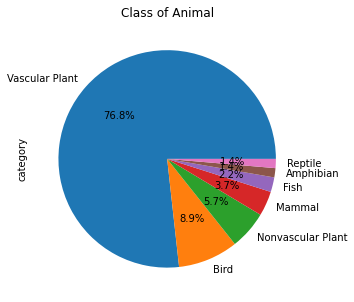

In [15]:
# Ploting category
plt.figure(figsize=(10,5))
df_species['category'].value_counts().plot.pie(autopct='%.1f%%')
plt.title('Class of Animal')
plt.show()

The Vascular Plant represents 76.3% of dataset, followed by bird with 9.2%

#### 3.1 - Observations

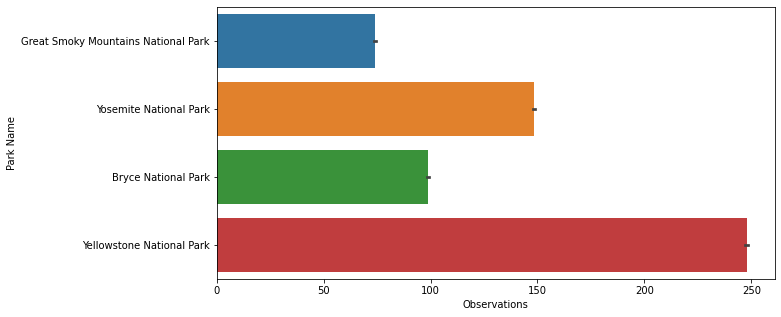

In [16]:
# Ploting observations per park
plt.figure(figsize=(10,5))
sns.barplot(y='park_name', x='observations', data=df_ob)
plt.xlabel('Observations')
plt.ylabel('Park Name')
plt.show()

Yellowstone National Park has the majority observations.

#### 3.2 - Extinction risk

The number of observations is pretty similar between species.

In [39]:
print(df_species['conservation_status'].value_counts())

Regular               5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64
191


Now let's check wich animal type has greater risk of endangered.

<Figure size 1800x360 with 0 Axes>

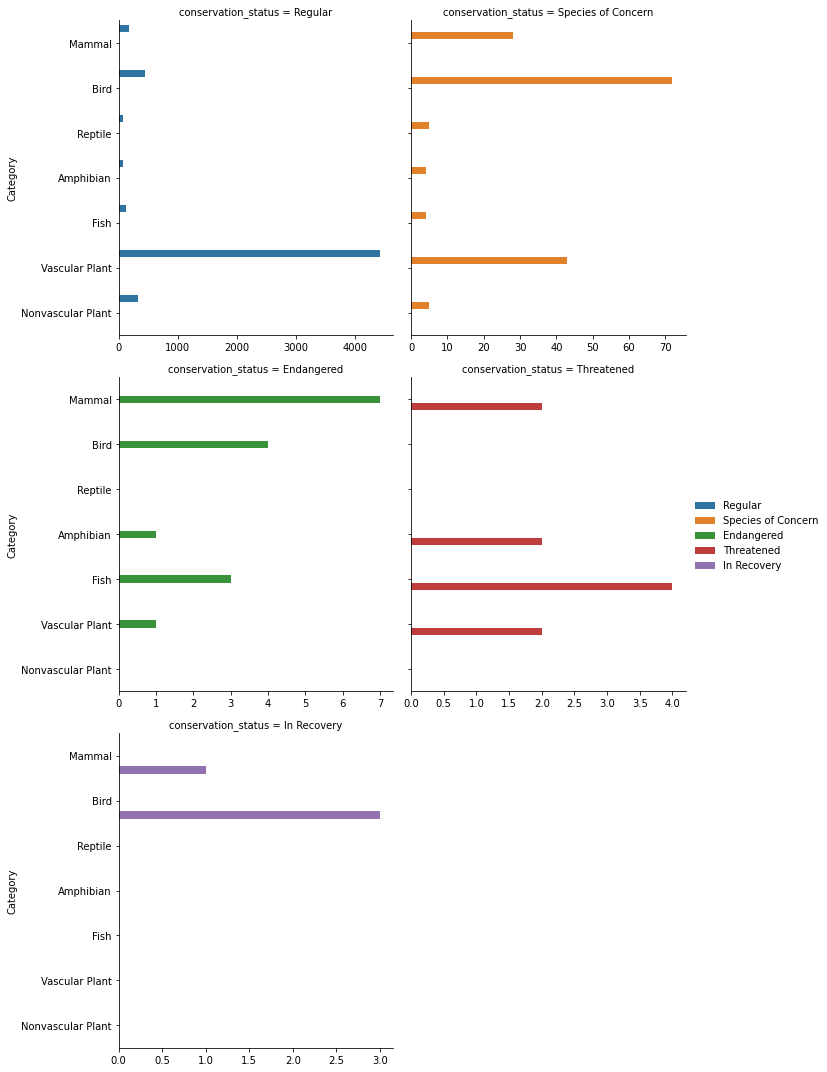

In [18]:
plt.figure(figsize=(25, 5))
ax = sns.catplot(
    y='category', 
    data=df_species, 
    hue='conservation_status', 
    kind='count', col='conservation_status', 
    col_wrap = 2, 
    sharex = False,
).add_legend()
ax.set_axis_labels('', 'Category')
plt.show()

Let's focus on `Endangered`, `Threatened` and `Species of Concern`

In [19]:
conservationCategory = df_species[df_species.conservation_status != 'Regular'].groupby(['conservation_status', 'category'])['scientific_name']\
.count().unstack()
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


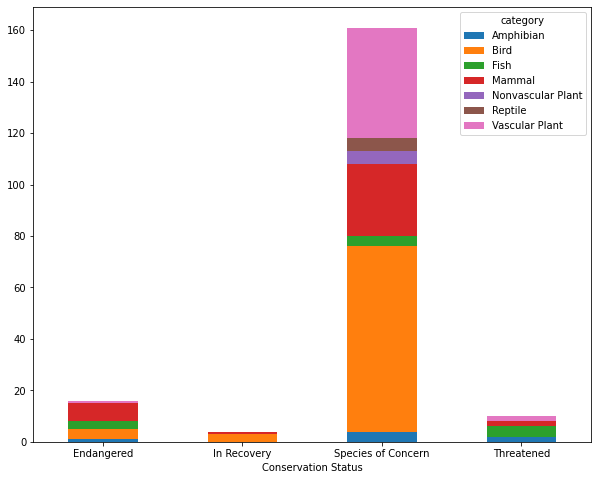

In [20]:
ax = conservationCategory.plot(kind='bar', figsize=(10,8), stacked=True)
ax.set_xlabel('Conservation Status')
plt.xticks(rotation = 0)
plt.show()

* **Species of Concern** is an informal term. It is not defined in the federal Endangered **Species** Act. The term commonly refers to **species** that are declining or appear to be in need of conservation. Many agencies and organizations maintain lists of at-risk **species**.

*  **Threatened species** are **plants** and animals that are likely to become **endangered** within the foreseeable future throughout all or a significant portion of its range.

* **Endangered species** are those **plants** and animals that have become so rare they are in danger of becoming extinct.

* **In Recovery**: formerly Endangered, but currently neither in danger of extinction throughout all or a significant portion of its range.

Now we can draw some conclusions:

* `Bird` is the category with highest `Species of Concern`
* `Fish` is the category with highest `Threatened`;
* `Mammal` is the category with highest `Endangered`;


To help the analisys we are creating a 'Preserved' column, it is contain information about regular or dangerous situation: 
* `Regular` represents regular situation;
* `Not Regular` represents endangered or risk situation;

#### 3.3 Preserved Species

In [21]:
df_species['preserved'] = df_species['conservation_status'].apply(lambda x: 'Regular' if x=='Regular' else 'Not Regular')
print(df_species['preserved'].value_counts())

Regular        5633
Not Regular     191
Name: preserved, dtype: int64


In [22]:
# Merging both data
df = pd.merge(df_ob, df_species)
print("Dataset has {} data points with {} variables each.".format(*df.shape))
df.head()

Dataset has 25632 data points with 8 variables each.


,scientific_name,park_name,observations,category,common_names,conservation_status,first_common_names,preserved
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Regular,Purple,Regular
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Regular,Purple,Regular
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Regular,Purple,Regular
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Regular,Purple,Regular
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Regular,American,Regular


In [23]:
print(df.isnull().sum())

scientific_name        0
park_name              0
observations           0
category               0
common_names           0
conservation_status    0
first_common_names     0
preserved              0
dtype: int64


In [24]:
preservedCategory = df.groupby(['park_name', 'preserved', 'common_names'])['observations'].sum().reset_index()
preservedCategory.head()

,park_name,preserved,common_names,observations
0,Bryce National Park,Not Regular,"American Badger, Badger",159
1,Bryce National Park,Not Regular,American Bittern,74
2,Bryce National Park,Not Regular,"American Fever-Few, Wild Quinine",73
3,Bryce National Park,Not Regular,American Peregrine Falcon,72
4,Bryce National Park,Not Regular,"American Swallow-Tailed Kite, Swallow-Tailed Kite",94


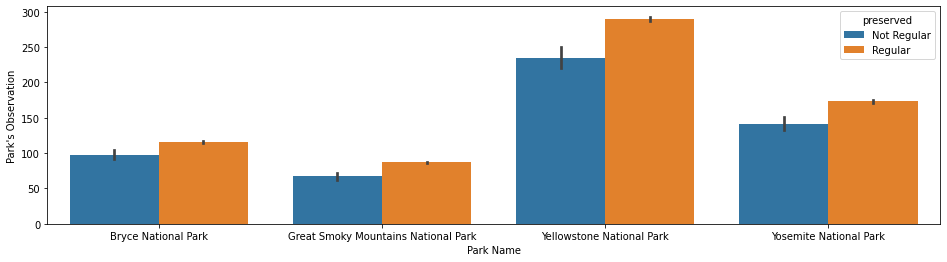

In [25]:
plt.figure(figsize=(16, 4))
sns.barplot(x='park_name', y='observations', data=preservedCategory, hue='preserved')
plt.xlabel('Park Name')
plt.ylabel("Park's Observation")
plt.show()

`Yellowstone National Park` is home to the largest concentration of Preserved species.

In [26]:
riskCategory = df[df['preserved'] != 'Regular']\
.groupby(['park_name', 'category', 'preserved'])['observations'].sum().reset_index()
riskCategory.head()

,park_name,category,preserved,observations
0,Bryce National Park,Amphibian,Not Regular,498
1,Bryce National Park,Bird,Not Regular,7608
2,Bryce National Park,Fish,Not Regular,731
3,Bryce National Park,Mammal,Not Regular,4701
4,Bryce National Park,Nonvascular Plant,Not Regular,486


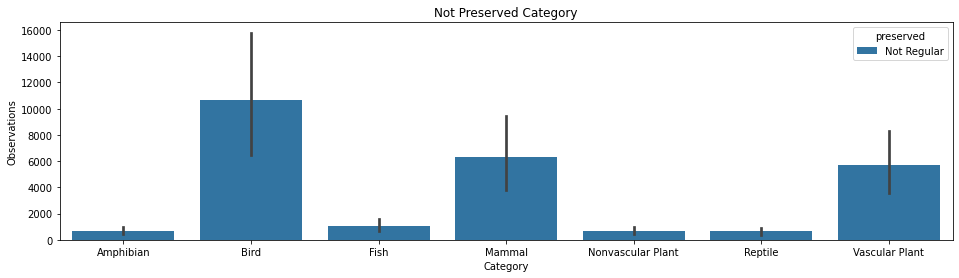

In [27]:
plt.figure(figsize=(16,4))
sns.barplot('category', 'observations', data=riskCategory, hue='preserved')
plt.xlabel('Category')
plt.ylabel('Observations')
plt.title('Not Preserved Category')
plt.show()

In overall, `Bird`'s are the category with highest risk.

#### 3.4 Species of Concern


 `Bird` has the highest status in this category. 

In [44]:
bird = animal_category('Bird')
bird['%'] = ((bird['Count'] / bird['Count'].sum()) * 100).round(1)
bird.head()


,Word,Count,%
164,Warbler,59,27.1
413,Sparrow,29,13.3
173,American,21,9.6
169,Northern,20,9.2
343,Flycatcher,18,8.3


`Warbler` has 27.1% of the majority in `Species of Concern`, followed by `Sparrow` with 13.3%.

#### 3.3 Threatened species

`Fish` is the category with highest Threatened rank. 

In [46]:
fish = animal_category('Fish')
fish['%'] = ((fish['Count'] / fish['Count'].sum()) * 100).round(1)
fish.head()

,Word,Count,%
24,Shiner,20,22.0
13,Darter,19,20.9
29,Trout,11,12.1
101,Chub,7,7.7
82,Sucker,7,7.7


`Shiner` has 22% of the majority in `Threatened` species, followed by `Darter` with 21%.

#### 3.5 Endangered species

`Mammal` is the specie with highest `Endangered` rank.

In [49]:
mammal = animal_category('Mammal')
mammal['%'] = ((mammal['Count'] / mammal['Count'].sum()) * 100).round(1)
mammal.head()

,Word,Count,%
199,Bat,23,16.1
37,Shrew,18,12.6
5,Myotis,17,11.9
11,Mouse,16,11.2
21,Chipmunk,13,9.1


`Bat` has 16.1% of the majority in `Endangered` species, followed by `Shrew` with 12.6%.

## Conclusions

The project was able to make several data visualizations about the species in National Park. It is worth mentioning that the DataSet represents 7 days of observations.

- What is the majority class of animals?

  *Answer: Vascular Plant represent about 76.8% of the animal class in both parks.*
  

- Which species has the highest `Species of Concern` rank?

  *Answer: Birds has the highest status, `Warbler` has 27.1% of the majority in `Species of Concern` category.*
  

- Which species has the highest `Threatened` rank?

  *Answer: Fish has the highest Threatened status, the `Shiner` has 22% of the majority in `Threatened` category.*
  

- Which species has the highest `Endangered` rank?

  *Answer: Mammals has the highest Endangered status, `Bat` has 16.1% of the majority in `Endangered` category.*
  

 
We can assume that Yellowstone National Park might be much larger than the other parks, which explain the largest observation and biodiversity status, for further research the area of all parks would be interesting,

  